In [82]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [83]:
data = pd.read_csv("bankloan.csv")
# print(data.head())
#remove zip code column,
keep = ["Age", "Income", "Mortgage"]
data = data[keep]
# data = data.drop(["ZIP.Code"], axis=1)
# data = data.drop(["ID"], axis=1)
# data = data.drop(["Online"], axis=1)
# data = data.drop(["Securities.Account"], axis=1)
# data = data.drop(["Personal.Loan"], axis=1)
# data = data.drop(["CreditCard"], axis=1)
# data = data.drop(["CD.Account"], axis=1)
data = data.dropna()

#change loan to True if 1 or False if 0
data["Mortgage"] = data["Mortgage"].apply(lambda x: True if x > 0 else False)
print(data.head())

Y_r = data["Mortgage"]
X_r = data.drop(["Mortgage"], axis=1)
#hold 10% for test
X_r, X_test, Y_r, Y_test = sklearn.model_selection.train_test_split(X_r, Y_r, test_size=0.1)
X_r_np = np.array(X_r)
X_test_np = np.array(X_test)
scaler_x = MinMaxScaler()
X_r_scaled = scaler_x.fit_transform(X_r_np)
X_r_test_scaled = scaler_x.transform(X_test_np)
print(X_r_scaled)
print(Y_r)


   Age  Income  Mortgage
0   25      49     False
1   45      34     False
2   39      11     False
3   35     100     False
4   35      45     False
[[0.06818182 0.86574074]
 [0.13636364 0.53240741]
 [0.40909091 0.28703704]
 ...
 [0.06818182 0.40277778]
 [0.52272727 0.91203704]
 [0.         0.01851852]]
1307    False
4916    False
129     False
4444    False
3939     True
        ...  
1763    False
3034     True
4772    False
2988     True
3824    False
Name: Mortgage, Length: 4500, dtype: bool


In [84]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dummy = DummyClassifier(strategy='most_frequent')
#Use K Fold
kf = KFold(5, shuffle=True, random_state=42)
#Use Kfold on DummyRegressor
scores = cross_val_score(dummy, X_r_scaled, Y_r, cv=kf)
print(-scores.mean())


-0.6913333333333334


In [85]:
#perform Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

#Use K Fold
kf = KFold(10, shuffle=True, random_state=42)
#Use Kfold on DecisionTreeRegressor
tree = DecisionTreeClassifier()
tree.fit(X_r_scaled, Y_r)

scores = cross_val_score(tree, X_r_scaled, Y_r, cv=kf)
print("Enew: ", -scores.mean())
#print enew


Enew:  -0.5933333333333334


Tuned Decision Tree Parameters: {'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score is 0.6913333333333334


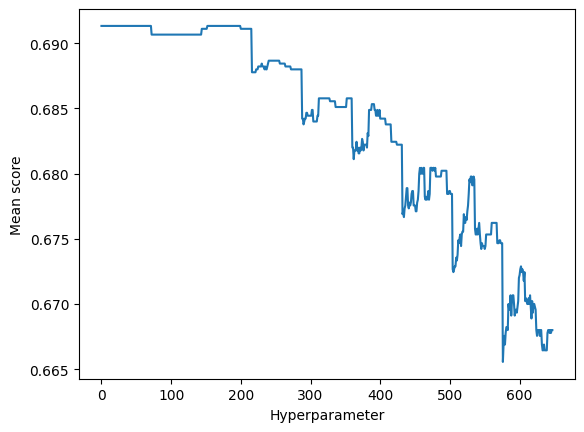

In [86]:
#sweep over hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Use K Fold
kf = KFold(10, shuffle=True, random_state=42)
#Use Kfold on Classifier
tree = DecisionTreeClassifier()
#Set up parameters to sweep over
param_grid = {'max_depth': np.arange(1, 10), 'min_samples_split':np.arange(2, 10), 'min_samples_leaf':np.arange(1, 10)}
#Use GridSearchCV to find best hyperparameters
tree_cv = GridSearchCV(tree, param_grid, cv=kf)
tree_cv.fit(X_r_scaled, Y_r)
#Print best hyperparameters
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

#graph results
import matplotlib.pyplot as plt

#Get scores for each hyperparameter
scores = tree_cv.cv_results_['mean_test_score']
#Plot scores
plt.plot(scores)
plt.xlabel('Hyperparameter')
plt.ylabel('Mean score')
plt.show()
#plot the deciision tree


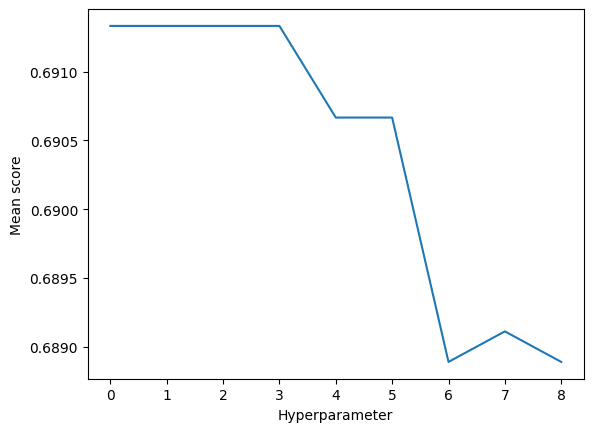

Tuned Decision Tree Parameters: {'estimator__max_depth': 2, 'n_estimators': 50}
Best score is 0.6913333333333334


In [88]:
#do bagging classifier

from sklearn.ensemble import BaggingClassifier

#Use K Fold
kf = KFold(10, shuffle=True, random_state=42)
#Use Kfold on Classifier

tree = DecisionTreeClassifier()
#do a paramter sweep
#Use GridSearchCV to find best hyperparameters with bagging
param_grid = {
    'estimator__max_depth': [2, 4, 6],  # Example parameter for the base estimator
    'n_estimators': [50, 100, 150],  # Number of base estimators in the Bagging ensemble
    # Add other BaggingClassifier parameters you want to tune here
}
tree_cv = GridSearchCV(BaggingClassifier(tree), param_grid, cv=kf)
tree_cv.fit(X_r_scaled, Y_r)

scores = tree_cv.cv_results_['mean_test_score']
plt.plot(scores)
plt.xlabel('Hyperparameter')
plt.ylabel('Mean score')
plt.show()
#Print best hyperparameters
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


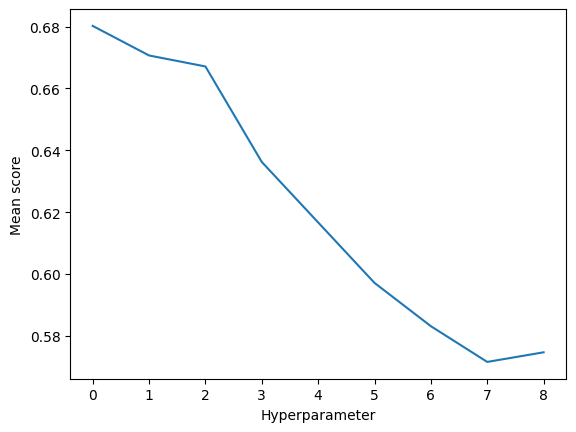

In [90]:
#Do boosting
from sklearn.ensemble import AdaBoostClassifier

#Use K Fold
kf = KFold(10, shuffle=True, random_state=42)
#Use Kfold on Classifier
tree = DecisionTreeClassifier()
#do a paramter sweep
#Use GridSearchCV to find best hyperparameters with boosting
param_grid = {
    'estimator__max_depth': [2, 4, 6],  # Example parameter for the base estimator
    'n_estimators': [50, 100, 150],  # Number of base estimators in the Bagging ensemble
    # Add other BaggingClassifier parameters you want to tune here
}

tree_cv = GridSearchCV(AdaBoostClassifier(tree), param_grid, cv=kf)
tree_cv.fit(X_r_scaled, Y_r)

scores = tree_cv.cv_results_['mean_test_score']
plt.plot(scores)
plt.xlabel('Hyperparameter')
plt.ylabel('Mean score')
plt.show()

